In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score

## V_diff

In [4]:
yes = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[999,:50000]
no = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[999,:50000]
diff = yes - no

In [9]:
fig, axs = plt.subplots(nrows = 3, figsize = (15,15))

axs[0].plot(np.arange(0,2,1/5000), yes[17000:27000])
axs[1].plot(np.arange(0,2,1/5000), no[17000:27000])
axs[2].plot(np.arange(0,2,1/5000), diff[17000:27000])

axs[0].set_ylabel("Voltage (mV)")
axs[0].set_xlabel("Time (s)")
axs[1].set_ylabel("Voltage (mV)")
axs[1].set_xlabel("Time (s)")
axs[2].set_ylabel("Voltage (mV)")
axs[2].set_xlabel("Time (s)")

axs[0].set_title("Whole voltage")
axs[1].set_title("No Na+ voltage")
axs[2].set_title("Na+ differential voltage")
plt.close()

## Naive fit

In [9]:
rnn = np.load("/media/hdd01/sklee/CA1_clust4-60/gru_whole_h50_output.npy")
glm1 = np.load("/media/hdd01/sklee/CA1_clust4-60/glm_whole_s10_h1_output.npz")["test"]
glm2 = np.load("/media/hdd01/sklee/CA1_clust4-60/glm_whole_s10_h2_output.npz")["test"]
tcn = np.load("/media/hdd01/sklee/CA1_clust4-60/tcn_whole_s10_h15_output.npy")
true = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[999,:50000]
true -= np.mean(true)
diff = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff.npy")[-50000:]

rnn_resid = true - rnn
glm1_resid = true - glm1
glm2_resid = true - glm2
tcn_resid = true - tcn

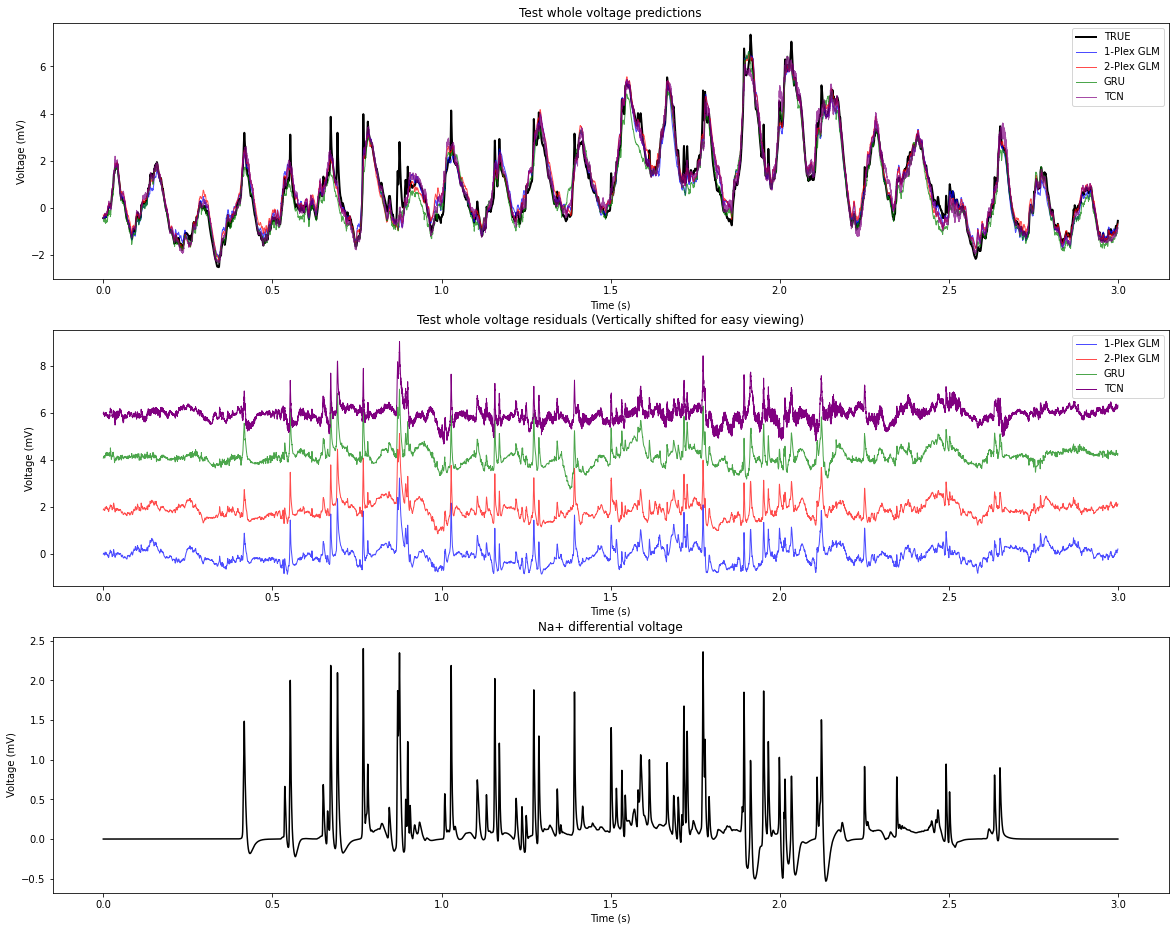

In [11]:
fig, axs = plt.subplots(nrows=3, figsize = (20,16))

axs[0].plot(np.arange(0,3,1/5000), true[15000:30000], linewidth=2, alpha=1, color="black", label="TRUE")
axs[0].plot(np.arange(0,3,1/5000), glm1[15000:30000], linewidth=1, alpha=0.7, color="blue", label="1-Plex GLM")
axs[0].plot(np.arange(0,3,1/5000), glm2[15000:30000], linewidth=1, alpha=0.7, color="red", label="2-Plex GLM")
axs[0].plot(np.arange(0,3,1/5000), rnn[15000:30000], linewidth=1, alpha=0.7, color="green", label="GRU")
axs[0].plot(np.arange(0,3,1/5000), tcn[15000:30000], linewidth=1, alpha=0.7, color="purple", label="TCN")
axs[0].legend()
axs[0].set_title("Test whole voltage predictions")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Voltage (mV)")

axs[1].plot(np.arange(0,3,1/5000), glm1_resid[15000:30000], linewidth=1, alpha=0.7, color="blue", label="1-Plex GLM")
axs[1].plot(np.arange(0,3,1/5000), glm2_resid[15000:30000]+2, linewidth=1, alpha=0.7, color="red", label="2-Plex GLM")
axs[1].plot(np.arange(0,3,1/5000), rnn_resid[15000:30000]+4, linewidth=1, alpha=0.7, color="green", label="GRU")
axs[1].plot(np.arange(0,3,1/5000), tcn_resid[15000:30000]+6, linewidth=1, alpha=1, color="purple", label="TCN")
axs[1].legend()
axs[1].set_title("Test whole voltage residuals (Vertically shifted for easy viewing)")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Voltage (mV)")

axs[2].plot(np.arange(0,3,1/5000), diff[15000:30000], color="black")
axs[2].set_title("Na+ differential voltage")
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("Voltage (mV)")


plt.show()
#plt.savefig("/media/hdd01/sklee/CA1_clust4-60/plots/naive_fit.png", 
               #bbox_inches='tight', dpi=150)
#plt.close()

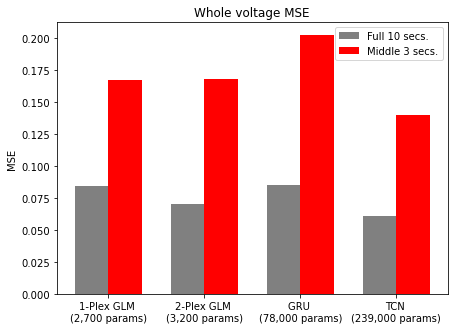

In [14]:
labels = ['1-Plex GLM \n(2,700 params)',
          '2-Plex GLM \n(3,200 params)',
          'GRU \n(78,000 params)',
          'TCN \n(239,000 params)']
whole_mse = [np.mean(glm1_resid**2),
     np.mean(glm2_resid**2),
     np.mean(rnn_resid**2),
     np.mean(tcn_resid**2)]
spike_mse = [np.mean(glm1_resid[15000:30000]**2),
     np.mean(glm2_resid[15000:30000]**2),
     np.mean(rnn_resid[15000:30000]**2),
     np.mean(tcn_resid[15000:30000]**2)]
whole_score = [
    explained_variance_score(true, glm1),
    explained_variance_score(true, glm2),
    explained_variance_score(true, rnn),
    explained_variance_score(true, tcn)
]
spike_score = [
    explained_variance_score(true[15000:30000], glm1[15000:30000]),
    explained_variance_score(true[15000:30000], glm2[15000:30000]),
    explained_variance_score(true[15000:30000], rnn[15000:30000]),
    explained_variance_score(true[15000:30000], tcn[15000:30000])
]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (7,5))
rects1 = ax.bar(x - width/2, whole_mse, width, label='Full 10 secs.', color="gray")
rects2 = ax.bar(x + width/2, spike_mse, width, label='Middle 3 secs.', color="red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MSE')
ax.set_title('Whole voltage MSE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
#ax.set_ylim(0.9, 1)

plt.show()
#plt.savefig("/media/hdd01/sklee/CA1_clust4-60/plots/naive_fit_var_exp.png", 
               #bbox_inches='tight', dpi=150)
#plt.close()

## Differential fit

In [19]:
true = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff.npy")[-50000:]
glm1 = np.load("/media/hdd01/sklee/CA1_clust4-60/glm_diff_s10_h1_output.npz")["test"]
glm2 = np.load("/media/hdd01/sklee/CA1_clust4-60/glm_diff_s10_h2_output.npz")["test"]
gru = np.load("/media/hdd01/sklee/CA1_clust4-60/gru_diff_s4_h15_output.npy")

glm1_resid = true - glm1
glm2_resid = true - glm2
gru_resid = true - gru

glm1_mse = np.round(np.mean(glm1_resid**2), 5)
glm2_mse = np.round(np.mean(glm2_resid**2), 5)
gru_mse = np.round(np.mean(gru_resid**2), 5)

glm1_score = np.round(explained_variance_score(true, glm1), 5)
glm2_score = np.round(explained_variance_score(true, glm2), 5)
gru_score = np.round(explained_variance_score(true, gru), 5)

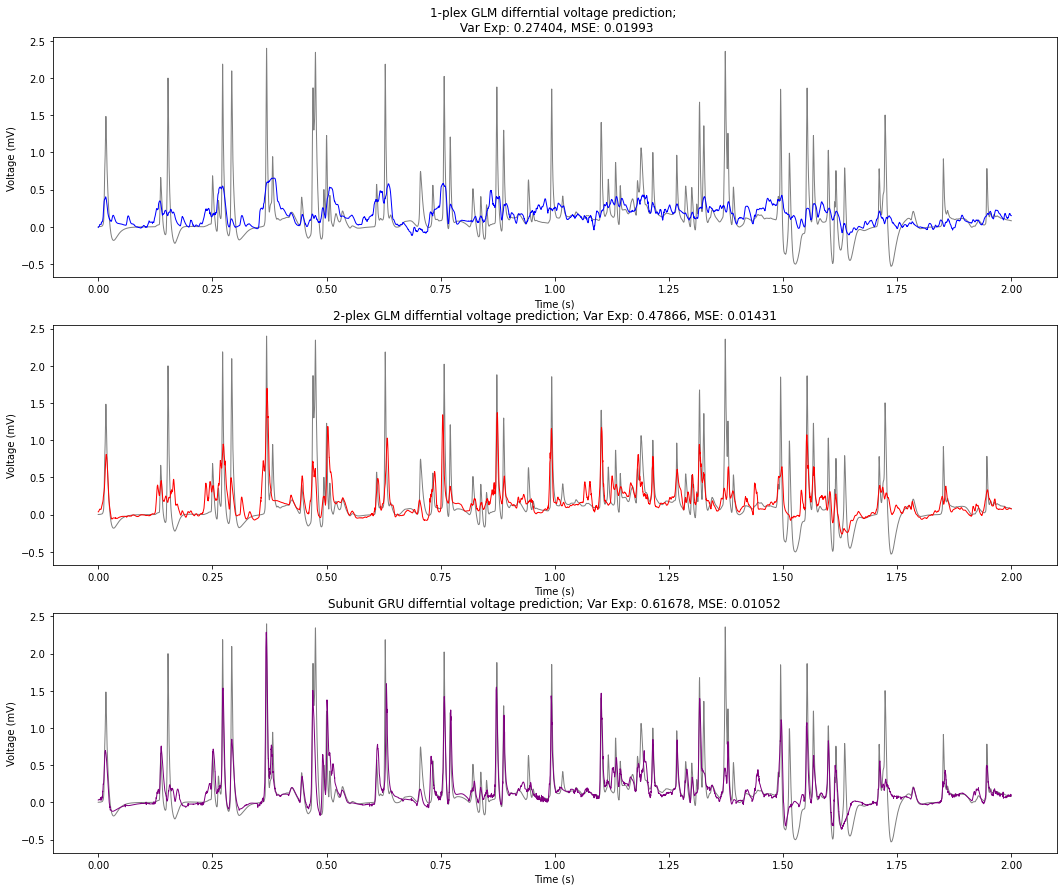

In [20]:
fig, axs = plt.subplots(nrows=3, figsize = (18,15))

axs[0].plot(np.arange(0,2,1/5000), true[17000:27000], color="gray", label="TRUE", linewidth=1)
axs[0].plot(np.arange(0,2,1/5000), glm1[17000:27000], color="blue", label="GLM_1", linewidth=1)
axs[0].set_title("1-plex GLM differntial voltage prediction; \n Var Exp: "+str(glm1_score)+", MSE: "+str(glm1_mse))
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Voltage (mV)")

axs[1].plot(np.arange(0,2,1/5000), true[17000:27000], color="gray", label="TRUE", linewidth=1)
axs[1].plot(np.arange(0,2,1/5000), glm2[17000:27000], color="red", label="GLM_2", linewidth=1)
axs[1].set_title("2-plex GLM differntial voltage prediction; Var Exp: "+str(glm2_score)+", MSE: "+str(glm2_mse))
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Voltage (mV)")

axs[2].plot(np.arange(0,2,1/5000), true[17000:27000], color="gray", label="TRUE", linewidth=1)
axs[2].plot(np.arange(0,2,1/5000), gru[17000:27000], color="purple", label="GRU", linewidth=1)
axs[2].set_title("Subunit GRU differntial voltage prediction; Var Exp: "+str(gru_score)+", MSE: "+str(gru_mse))
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("Voltage (mV)")

plt.show()
#plt.savefig("/media/hdd01/sklee/CA1_clust4-60/plots/diff_fit.png", 
               #bbox_inches='tight', dpi=150)
#plt.close()

## Combined fit

In [31]:
true = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[999,:50000]
true -= np.mean(true)

rnn = np.load("/media/hdd01/sklee/CA1_clust4-60/gru_whole_h50_output.npy")
glm = np.load("/media/hdd01/sklee/CA1_clust4-60/glm_nona_s10_h1_output.npz")["test"]
tcn = np.load("/media/hdd01/sklee/CA1_clust4-60/tcn_whole_s10_h15_output.npy")

glm1_diff = np.load("/media/hdd01/sklee/CA1_clust4-60/glm_diff_s10_h1_output.npz")["test"]
glm2_diff = np.load("/media/hdd01/sklee/CA1_clust4-60/glm_diff_s10_h2_output.npz")["test"]
gru_diff = np.load("/media/hdd01/sklee/CA1_clust4-60/gru_diff_s4_h15_output.npy")

glm1_whole = np.load("/media/hdd01/sklee/CA1_clust4-60/glm_whole_s10_h1_output.npz")["test"]
glm2_whole = np.load("/media/hdd01/sklee/CA1_clust4-60/glm_whole_s10_h2_output.npz")["test"]

glm1 = glm1_diff + glm
glm2 = glm2_diff + glm
gru = gru_diff + glm

glm1_resid = true - glm1
glm2_resid = true - glm2
gru_resid = true - gru
rnn_resid = true - rnn
tcn_resid = true - tcn
glm1_whole_resid = true - glm1_whole
glm2_whole_resid = true - glm2_whole

In [32]:
labels = ['GLM_1 \n(2,700 params)',
            'GLM_2 \n (3,200 params)',
            '2stage_GLM_1 \n(5,900 params)',
          '2stage_GLM_2 \n(6,400 params)',
          'GRU \n(8,500 params)',
          'RNN \n(78,000 params)',
          'TCN \n(239,000 params)']
whole_mse = [np.mean(glm1_whole_resid**2),
    np.mean(glm2_whole_resid**2),
    np.mean(glm1_resid**2),
     np.mean(glm2_resid**2),
     np.mean(gru_resid**2),
     np.mean(rnn_resid**2),
     np.mean(tcn_resid**2)]
spike_mse = [np.mean(glm1_whole_resid[15000:30000]**2),
    np.mean(glm2_whole_resid[15000:30000]**2),
    np.mean(glm1_resid[15000:30000]**2),
     np.mean(glm2_resid[15000:30000]**2),
     np.mean(gru_resid[15000:30000]**2),
     np.mean(rnn_resid[15000:30000]**2),
     np.mean(tcn_resid[15000:30000]**2)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (13,5))
rects1 = ax.bar(x - width/2, whole_mse, width, label='Full 10 secs.', color="gray")
rects2 = ax.bar(x + width/2, spike_mse, width, label='Middle 3 secs.', color="red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MSE')
ax.set_title('Whole voltage MSE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#ax.set_ylim(0.9,1)

#plt.show()
plt.savefig("/media/hdd01/sklee/CA1_clust4-60/plots/2stage_fit_mse.png", 
               bbox_inches='tight', dpi=150)
plt.close()

In [28]:
fig, axs = plt.subplots(nrows = 3, figsize = (15,15))

axs[0].plot(np.arange(0,2,1/5000), true[17000:27000], linewidth=1, color="gray")
axs[0].plot(np.arange(0,2,1/5000), glm2[17000:27000], linewidth=1, color="red")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Voltage")
axs[0].set_title("2-stage 2-plex GLM whole voltage prediction")

axs[1].plot(np.arange(0,2,1/5000), true[17000:27000], linewidth=1, color="gray")
axs[1].plot(np.arange(0,2,1/5000), gru[17000:27000], linewidth=1, color="purple")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Voltage")
axs[1].set_title("2-stage GRU+GLM whole voltage prediction")

axs[2].plot(np.arange(0,2,1/5000), true[17000:27000], linewidth=1, color="gray")
axs[2].plot(np.arange(0,2,1/5000), tcn[17000:27000], linewidth=1, color="blue")
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("Voltage")
axs[2].set_title("TCN whole voltage prediction")

#plt.show()
#plt.savefig("/media/hdd01/sklee/CA1_clust4-60/plots/2stage_fit.png", 
               bbox_inches='tight', dpi=150)
#plt.close()

## 2-stage GLM Filters

In [21]:
glm_e = np.load("/media/hdd01/sklee/CA1_clust4-60/glm_nona_s10_h1_output.npz")["kern_e"][-4:]
glm2 = np.load("/media/hdd01/sklee/CA1_clust4-60/glm_diff_s10_h2_output.npz")["kern_e"][-8:]

e_idx = [1,2,5,7]
i_idx = [0,3,4,6]

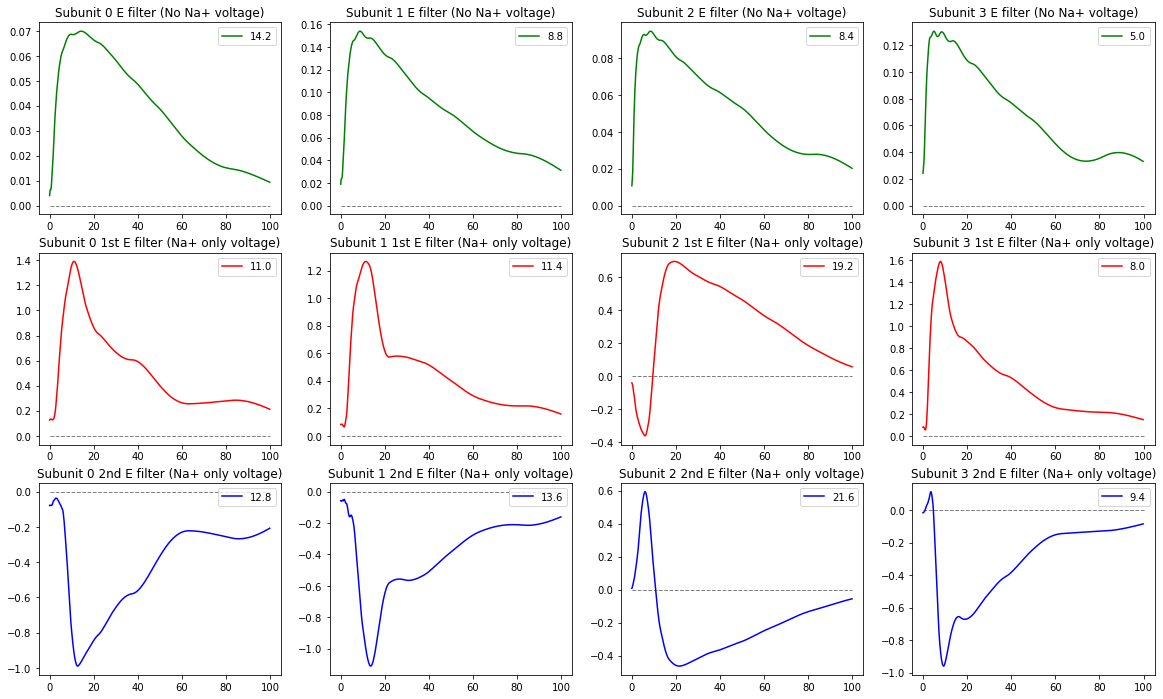

In [23]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize = (20,12))

for col in range(4):
    nona_max = np.argmax(glm_e[col]) / 5
    e_max = np.argmax(glm2[e_idx[col]]) / 5
    i_max = np.argmin(glm2[i_idx[col]]) / 5
    
    axs[0,col].plot(np.arange(0,100,1/5), glm_e[col], color="green", label=str(nona_max))
    axs[1,col].plot(np.arange(0,100,1/5), glm2[e_idx[col]], color="red", label=str(e_max))
    axs[2,col].plot(np.arange(0,100,1/5), glm2[i_idx[col]], color="blue", label=str(i_max))
    axs[0,col].legend()
    axs[1,col].legend()
    axs[2,col].legend()
    
    axs[0,col].hlines(y=0, xmin=0, xmax=100, linestyle="--", color="gray", linewidth=1)
    axs[1,col].hlines(y=0, xmin=0, xmax=100, linestyle="--", color="gray", linewidth=1)
    axs[2,col].hlines(y=0, xmin=0, xmax=100, linestyle="--", color="gray", linewidth=1)
    
    axs[0,col].set_title("Subunit "+str(col)+" E filter (No Na+ voltage)")
    axs[1,col].set_title("Subunit "+str(col)+" 1st E filter (Na+ only voltage)")
    axs[2,col].set_title("Subunit "+str(col)+" 2nd E filter (Na+ only voltage)")
    
plt.show()
#plt.savefig("/media/hdd01/sklee/CA1_clust4-60/plots/2stage_glm_filters.png", 
               #bbox_inches='tight', dpi=150)
#plt.close()

## Clust fit

In [6]:
C_syn_e = np.load("/media/hdd01/sklee/CA1_clust4-60/glm_diff_clust_s8_h2_output.npz")["C_syn_e"]
E_scale = np.load("/media/hdd01/sklee/CA1_clust4-60/glm_diff_clust_s8_h2_output.npz")["scale_e"]
eloc = np.load("/media/hdd01/sklee/CA1_clust4-60/data/Elocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")

true = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff.npy")[-50000:]
glm2 = np.load("/media/hdd01/sklee/CA1_clust4-60/glm_diff_s10_h2_output.npz")["test"]
glm2_clust = np.load("/media/hdd01/sklee/CA1_clust4-60/glm_diff_clust_s8_h2_output.npz")["test"]

glm2_resid = true - glm2
glm2_clust_resid = true - glm2_clust

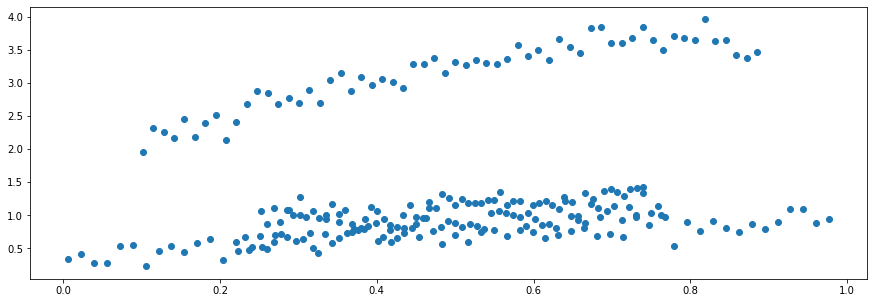

In [22]:
plt.figure(figsize = (15,5))
plt.scatter(eloc[880:1120,1], np.exp(E_scale)[880:1120])
plt.title("Learned synaptic weight vs. ")

In [23]:
C_syn_plot = np.zeros((240))
for e in range(240):
    C_syn_plot[e] = np.argmax(C_syn_e[:,e+880])

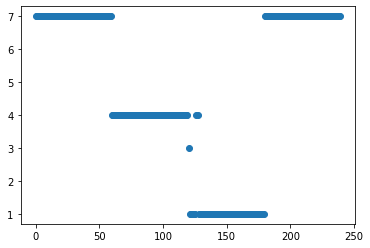

In [24]:
plt.scatter(np.arange(240), C_syn_plot)

In [10]:
fig, axs = plt.subplots(nrows = 2, figsize = (15,10))

axs[0].plot(np.arange(0,2,1/5000), true[17000:27000], linewidth=1, color="gray", label="True")
axs[0].plot(np.arange(0,2,1/5000), glm2[17000:27000], linewidth=1, color="blue", label="True")
axs[0].set_title("2-plex GLM differential voltage prediction; MSE: "+str(np.round(np.mean(glm2_resid**2), 5)))

axs[1].plot(np.arange(0,2,1/5000), true[17000:27000], linewidth=1, color="gray", label="True")
axs[1].plot(np.arange(0,2,1/5000), glm2_clust[17000:27000], linewidth=1, color="red", label="True")
axs[1].set_title("Clustering 2-plex GLM differential voltage prediction; MSE: "+str(np.round(np.mean(glm2_clust_resid**2), 5)))

#plt.show()

plt.savefig("/media/hdd01/sklee/CA1_clust4-60/plots/clust_glm_diff_fit.png", 
               bbox_inches='tight', dpi=150)
plt.close()